In [18]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/PratikBorkar04/consignment_pricing/main/notebook/dataset/final_dataset.csv")

In [20]:
df = df.drop(['Unnamed: 0'], axis=1)

In [21]:
df.head(1)

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,freight_cost,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,4521,India,3157


In [22]:
# To improve accuracy of Model
df["freight_cost"] = df["freight_cost"] - 1000

In [23]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/PratikBorkar04/consignment_pricing/main/notebook/dataset/xgb_dataset.csv")

df.head(1)


,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,freight_cost,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,3521,India,3157


In [46]:
df.isnull().sum()

country                 0
fulfill_via             0
vendor                  0
shipment_mode         248
unit_of_measure         0
line_item_quantity      0
line_item_value         0
pack_price              0
unit_price              0
weight                  0
freight_cost            0
location                0
distance                0
dtype: int64

In [48]:
df.isnull().sum()

country               0
fulfill_via           0
vendor                0
shipment_mode         0
unit_of_measure       0
line_item_quantity    0
line_item_value       0
pack_price            0
unit_price            0
weight                0
freight_cost          0
location              0
distance              0
dtype: int64

In [47]:
df.dropna(subset=['shipment_mode'], inplace=True)


In [24]:
df.to_csv("xgb_dataset.csv",index = False)

In [25]:
df.head(1)

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,freight_cost,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,3521,India,3157


In [26]:
accuracy_data = {'Operation':["Original",'Subtract', 'Subtract', 'Add', 'Add'],
                 'Value' :[0,500,1000,500,1000],
        'Accuracy %':[64, 65, 66, 63,62]}
accuracy_data = pd.DataFrame(accuracy_data)
accuracy_data

,Operation,Value,Accuracy %
0,Original,0,64
1,Subtract,500,65
2,Subtract,1000,66
3,Add,500,63
4,Add,1000,62


In [27]:
df.head()

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,freight_cost,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,3521,India,3157
1,Vietnam,Direct Drop,EXW,Air,60,31920,127360,3,0.07,1855,15007,India,3157
2,Vietnam,Direct Drop,EXW,Air,60,38000,121600,3,0.05,7590,44450,India,3157
3,Nigeria,Direct Drop,EXW,Air,240,416,2225,5,0.02,504,4920,India,7633
4,Tanzania,Direct Drop,EXW,Air,60,16667,60834,3,0.06,1478,5212,India,5659


In [28]:
#Preapare X and y variables
X = df.drop(columns=['freight_cost'],axis=1)

In [29]:
X.head()

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,India,3157
1,Vietnam,Direct Drop,EXW,Air,60,31920,127360,3,0.07,1855,India,3157
2,Vietnam,Direct Drop,EXW,Air,60,38000,121600,3,0.05,7590,India,3157
3,Nigeria,Direct Drop,EXW,Air,240,416,2225,5,0.02,504,India,7633
4,Tanzania,Direct Drop,EXW,Air,60,16667,60834,3,0.06,1478,India,5659


In [30]:
y = df['freight_cost']


In [31]:
y

0        3521
1       15007
2       44450
3        4920
4        5212
        ...  
6497     9181
6498     9181
6499     9181
6500     9181
6501     9181
Name: freight_cost, Length: 6502, dtype: int64

In [32]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [33]:
X = preprocessor.fit_transform(X)
X.shape

(6502, 48)

In [34]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5201, 48), (1301, 48))

In [35]:
print(X_test)

  (0, 9)	1.0
  (0, 12)	1.0
  (0, 18)	1.0
  (0, 21)	1.0
  (0, 28)	1.0
  (0, 41)	-0.23298680593787308
  (0, 42)	-0.42955317558918044
  (0, 43)	-0.3928622781558739
  (0, 44)	-0.189973351007332
  (0, 45)	-0.328797261077243
  (0, 46)	-0.5890063415533262
  (0, 47)	-1.4278911297786687
  (1, 5)	1.0
  (1, 13)	1.0
  (1, 20)	1.0
  (1, 22)	1.0
  (1, 35)	1.0
  (1, 41)	2.21431563704767
  (1, 42)	-0.45844573842953595
  (1, 43)	-0.45209779473889555
  (1, 44)	-0.48307325262589845
  (1, 45)	-0.7174895157141548
  (1, 46)	-0.5345264284858008
  (1, 47)	-0.5513665347766374
  (2, 9)	1.0
  :	:
  (1298, 47)	0.10679579269857212
  (1299, 6)	1.0
  (1299, 12)	1.0
  (1299, 16)	1.0
  (1299, 24)	1.0
  (1299, 30)	1.0
  (1299, 41)	2.21431563704767
  (1299, 42)	-0.49070910026793285
  (1299, 43)	-0.45348758368304654
  (1299, 44)	-0.2737161800412081
  (1299, 45)	-0.6527074732746695
  (1299, 46)	-3.4308390889007195e-05
  (1299, 47)	2.95242520156043
  (1300, 11)	1.0
  (1300, 13)	1.0
  (1300, 20)	1.0
  (1300, 21)	1.0
  (1300

In [36]:
#Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [37]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 8604.5300
- Mean Absolute Error: 4282.8879
- R2 Score: 0.3415
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11104.0745
- Mean Absolute Error: 4797.4313
- R2 Score: 0.1383


Lasso
Model performance for Training set
- Root Mean Squared Error: 8605.9793
- Mean Absolute Error: 4286.2697
- R2 Score: 0.3413
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11102.2032
- Mean Absolute Error: 4792.5296
- R2 Score: 0.1385


Ridge
Model performance for Training set
- Root Mean Squared Error: 8605.1600
- Mean Absolute Error: 4285.6191
- R2 Score: 0.3414
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11101.4980
- Mean Absolute Error: 4795.4254
- R2 Score: 0.1387


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 6530.0279
- Mean Absolute Error: 2745.48

In [38]:
#Results
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
6,XGBRegressor,0.664690
7,CatBoosting Regressor,0.638665
5,Random Forest Regressor,0.586714
4,Decision Tree,0.448702
3,K-Neighbors Regressor,0.413402
2,Ridge,0.138652
1,Lasso,0.138543
0,Linear Regression,0.138252
8,AdaBoost Regressor,0.030171


In [39]:
#XGBRegressor
XGBRegressor_model = XGBRegressor()
XGBRegressor_model = XGBRegressor_model.fit(X_train, y_train)
y_pred = XGBRegressor_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 66.47


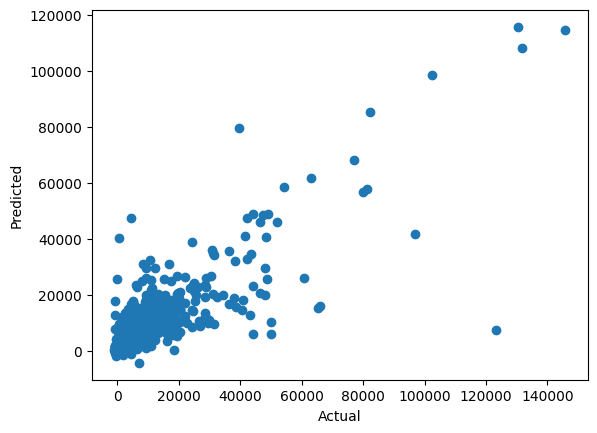

In [40]:
#Plot y_pred and y_test
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

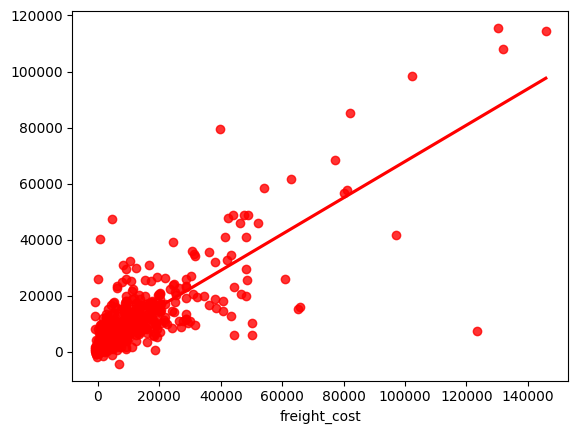

In [41]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [42]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
3107,332,3487.633301,-3155.633301
4885,3370,10014.256836,-6644.256836
1867,4265,7543.393066,-3278.393066
3269,-29,375.619598,-404.619598
5510,9181,10930.705078,-1749.705078
...,...,...,...
1608,31104,20522.970703,10581.029297
2191,4460,9291.162109,-4831.162109
624,12353,3973.855957,8379.144043
69,9181,9267.926758,-86.926758


In [43]:
pred_df["Difference"].mean()

225.28497174805995

In [45]:
df.isnull().sum()

country                 0
fulfill_via             0
vendor                  0
shipment_mode         248
unit_of_measure         0
line_item_quantity      0
line_item_value         0
pack_price              0
unit_price              0
weight                  0
freight_cost            0
location                0
distance                0
dtype: int64